In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Read data 
data = pd.read_csv('/Users/mario.iuliano/marios_env/Portfolio/test/iris/IRIS.csv')

In [3]:
#Explore 
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Create petal area 
data['petal_area'] = data.petal_length * data.petal_width

In [7]:
# Avg petal area by species
data.groupby('species')['petal_area'].mean()

species
Iris-setosa         0.3628
Iris-versicolor     5.7204
Iris-virginica     11.2962
Name: petal_area, dtype: float64

In [8]:
# Iris virginica has the highest average petal area

In [9]:
# What are the average sepal length and petal width for each species?
data.groupby('species')[['sepal_length', 'petal_width']].mean()

,sepal_length,petal_width
species,,
Iris-setosa,5.006,0.244
Iris-versicolor,5.936,1.326
Iris-virginica,6.588,2.026


In [10]:
# Which feature shows the most variation across species?
data.groupby('species')[['sepal_length','petal_length','petal_width','sepal_width']].mean()

,sepal_length,petal_length,petal_width,sepal_width
species,,,,
Iris-setosa,5.006,1.464,0.244,3.418
Iris-versicolor,5.936,4.260,1.326,2.770
Iris-virginica,6.588,5.552,2.026,2.974


In [11]:
means = data.groupby('species').mean()
means.max()-means.min()

sepal_length     1.5820
sepal_width      0.6480
petal_length     4.0880
petal_width      1.7820
petal_area      10.9334
dtype: float64

<Axes: >

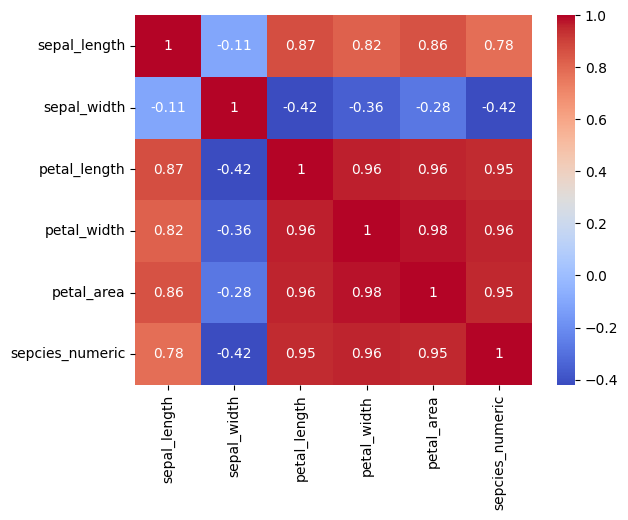

In [12]:
import seaborn as sns

map_sepcies = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['sepcies_numeric'] = data['species'].map(map_sepcies)
corr_df = data.drop(columns=['species'])
corr = corr_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [13]:
data.drop(columns=['petal_length', 'petal_area', 'sepcies_numeric'], inplace=True)

In [ ]:
# Modeling
# Split the data into train/test sets (80/20).
# Train a RandomForestClassifier to predict the species.
# What’s the accuracy on the test set?

from sklearn.model_selection import train_test_split

X = data.drop(columns=['species'])
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42)


In [15]:
# Train random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Predicted classes
predicted_class = rfc.predict(X_test)
# Classification report 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predicted_class))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



<Axes: >

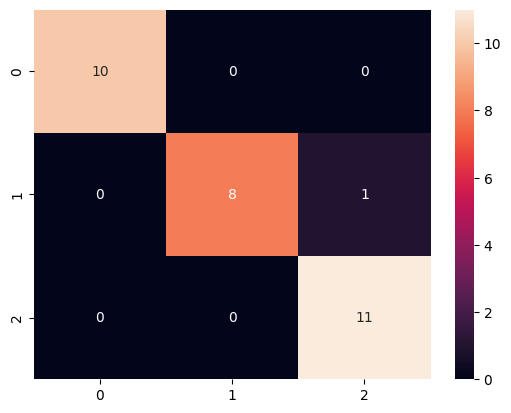

In [23]:
sns.heatmap(confusion_matrix(y_test, predicted_class),annot= True)

In [17]:
# Verify accuracy on test and train 
rfc.score(X_test, y_test), rfc.score(X_train, y_train)

(0.9666666666666667, 1.0)

In [48]:
## Feature Importance
#Show the top 2 features contributing to the classification. 
# Interpret what that might mean for product decision-making (e.g., “Feature X is highly predictive, so it should be monitored closely”).

importances = rfc.feature_importances_
importances

array([0.09785214, 0.01031604, 0.37606305, 0.51576877])

<Axes: >

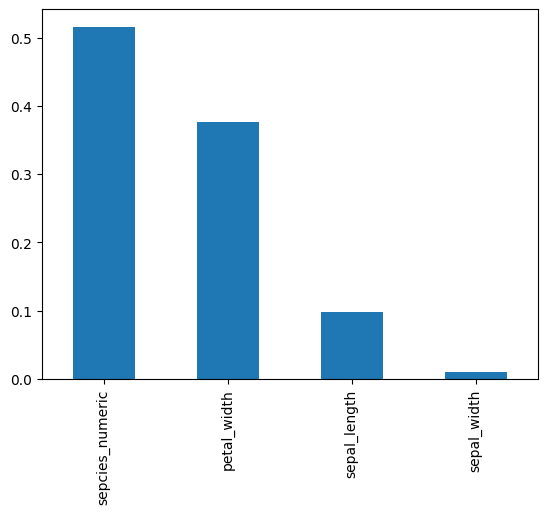

In [49]:
feature_importances = pd.Series(importances, index = X.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
feature_importances.plot(kind='bar')
